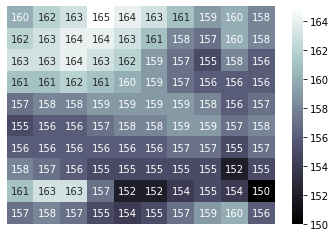

In [6]:
#1) 이미지 처리
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread("D:\Desktop\ssca_en-core\OpenCV\images\myImg\Lenna.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sns.heatmap(img_gray[:10,:10], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'B')

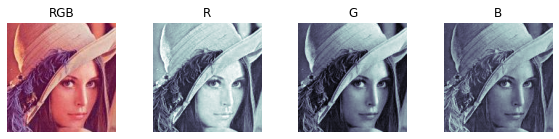

In [21]:
#1-2)이미지 처리에서 사이킷런에서 제공해주는 샘플 이미지 사용
from sklearn.datasets import load_sample_images

import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread("D:\Desktop\ssca_en-core\OpenCV\images\myImg\Lenna.png")
#opencv는 BGR이 기본값이기때분에 RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


plt.figure(figsize=(10,2))

#원본
plt.subplot(141)
plt.imshow(img_rgb[50:200,50:200,:])
plt.axis("off")
plt.title("RGB")
#R
plt.subplot(142)
plt.imshow(img_rgb[50:200,50:200,0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R")
#G
plt.subplot(143)
plt.imshow(img_rgb[50:200,50:200,1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G")
#B
plt.subplot(144)
plt.imshow(img_rgb[50:200,50:200,2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B")

In [ ]:
#1-3)로컬 이미지 opencv로 사용
from sklearn.datasets import load_sample_images
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

dataset = load_sample_images()     
len(dataset.images)       
img_rgb = dataset.images[0]

plt.figure(figsize=(10,2))

#원본
plt.subplot(141)
plt.imshow(img_rgb[50:200,50:200,:])
plt.axis("off")
plt.title("RGB")
#R
plt.subplot(142)
plt.imshow(img_rgb[50:200,50:200,0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R")
#G
plt.subplot(143)
plt.imshow(img_rgb[50:200,50:200,1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G")
#B
plt.subplot(144)
plt.imshow(img_rgb[50:200,50:200,2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B")

In [9]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')   
print(china.dtype)                              
print(china.shape)                              

flower = load_sample_image('flower.jpg') 
print(flower.dtype)                             
print(flower.shape)                             


uint8
(427, 640, 3)
uint8
(427, 640, 3)


Text(0.5, 1.0, 'img')

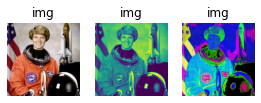

In [30]:
#1-4) scikit-image 패키지모듈의 이미지를 확인
import skimage
from skimage import color
img = skimage.data.astronaut()
img.shape

plt.subplot(141)
plt.imshow(img)
plt.axis("off")
plt.title('img')

#이미지를 저장후 다시 읽기
skimage.io.imsave("astronaut.png",img)
img_res = skimage.io.imread("astronaut.png")

#from skimage import color 이미지 변환
plt.subplot(142)
plt.imshow(color.rgb2gray(img_res))
plt.axis("off")
plt.title('img')


plt.subplot(143)
plt.imshow(color.rgb2hsv(img_res))
plt.axis("off")
plt.title('img')



Text(0.5, 1.0, 'img_rgb')

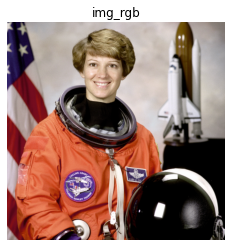

In [31]:
#1-5) 샘플을 저장한 것을 opencv로 호출해보자
import cv2

image = cv2.imread("astronaut.png")
image.shape

#각 채널을 분리
b,g,r =cv2.split(image)
img_rgb = cv2.merge([r,g,b])

plt.subplot(111)
plt.imshow(img_rgb)
plt.axis("off")
plt.title('img_rgb')

2) 이미지 필터링 : 화소 행렬을 다른 값으로 변경하는 것 입계값, 적응임계, 필터링, 블러링, 변환
2-1 threshold(src, thresh, maxval, type[,dst]) -> retval, dst : 하나의 픽셀값을 기준값을 이용해서 이진화
type   :   
THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0
THRESH_BINARY_INV  : 기준값을 넘으면 0 아니면 최대값
THRESH_TRUNC  : 기준값을 넘으면 기준값 아니면 최대값 ex) 기준값 200으로 잡고 최대값을 150 이미지가 0~180화소라면 150
THRESH_TOZERO :기준값을 넘으면 원래값 아니면 0
THRESH_TOZERO_INV : 기준값을 넘으면 0아니면 원래값


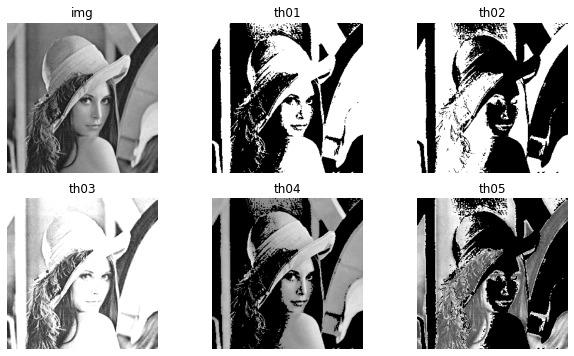

In [48]:
#2-1) threshold
from sklearn.datasets import load_sample_images
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
from skimage.data import coins
from skimage import color

#skimage.data에 coins
#img = coins()
#img.shape
#lenna 
img = cv2.imread("D:\Desktop\ssca_en-core\OpenCV\images\myImg\Lenna.png", 0)

# maxval와 thresh에 따라 달라지는 사진 확인
maxval = 255 
thresh = maxval/2 #임계값
ret01 , th01 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)
ret02 , th02 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY_INV)
ret03 , th03 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TRUNC)
ret04 , th04 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO)
ret05 , th05 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO_INV)

#for루프 사용해서 확인
title = ['img','th01','th02','th03','th04','th05']
images = [img, th01, th02, th03, th04, th05]

plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout(pad = 0.9)    
plt.show()

#2-2) adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
  :일정한 영역내에서 이웃한 픽셀들을 이용해서 기준값을 자체적으로 계산함
        adaptiveMethod : 기준값을 계산하는 방법
            cv2.ADAPTIVE_THRESH_MEAN_C : 영역내에서 평균값에 C값을 뺀 값을 기준으로한다
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 가우신안 블러링을 한 후 C값을 뺀 값을 기준으로 한다.
        thresholdType  
            THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0
            THRESH_BINARY_INV  : 기준값을 넘으면 0 아니면 최대값
        blockSize : 적용할 임계처리
        C : 평균, 가중평균에서 차감할 값

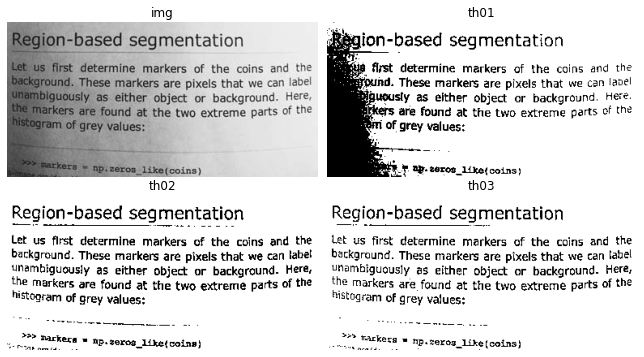

In [55]:
##2-2) adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
from sklearn.datasets import load_sample_images
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
from skimage.data import coins
from skimage import color

from skimage.data import page


img = page()

maxval = 255 
thresh = 126

ret01 , th01 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)

blockSize = 15
C = 20

th02 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
th03 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

#for루프 사용해서 확인
title = ['img','th01','th02','th03']
images = [img, th01, th02, th03]

plt.figure(figsize=(9,5))
for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout(pad = 0.9)    
plt.show()


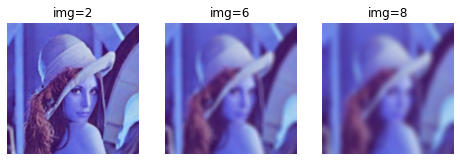

In [11]:
#2-3) 이미지 샘플 필터링
# 이미지 커널크기가 커지면 이미지가 점점 흐려진다.
# 이미지 필터링은 필터, 커널작업으로 정방행렬 정의 하고 커널을 이동시켜서 같은 이미지와 곱한 결과값
from sklearn.datasets import load_sample_images
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
from skimage.data import astronaut
from skimage import color
import numpy as np


img = astronaut() #(512,512,3)
img = cv2.resize(img, dsize=(150,150))

plt.figure(figsize=(8,3))

for i, k in enumerate([2,6,8]):

    kernel = np.ones((k,k)) /k**2
    img = cv2.filter2D(img, -1, kernel= kernel)
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title('img={}'.format(k))
plt.show()

Text(0.5, 1.0, 'img_B')

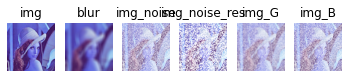

In [31]:
#2-4) 블러링 작업
#  - blur(src, kerenl_size) = 픽셀의 평균값으로 균일화시킨다. 잡음제거, 흑백사진
#  - medianBlur(src, kernel_size) = 중간값으로   균일화 시킨다.  
#  -  getGaussianKernel(ksize, sigma[, ktype]) -> retval  = 가우시안 블러링  
#  - GaussianBlur(src, kernal_size , sigmaX)
#     가우시안 블러링은 가우시안함수 G를 커널로 사용한다 
#     가우시안 커널은 가운 위치 (x,y)와 커널 위치 (x+u,y+v)의 거리차이 (u,v)가 클수록 가중치가 작아진다.
#  - bilateralFilter(src, d(커널크기), sigmaColor(색공간 표준편차), sigmaSpace(거리공간의 표준편차)[, dst[, borderType]]) -> dst  -> 양방향 필터링 

from sklearn.datasets import load_sample_images
import cv2 
import seaborn as sns
from matplotlib import pyplot as plt
from skimage.data import astronaut
from skimage import color
import numpy as np

#원본이미지
img = cv2.imread("D:\Desktop\ssca_en-core\OpenCV\images\myImg\Lenna.png", 1)

# blur이미지
blur = cv2.blur(img,(20,20)) #(20,20)의 영역의 평균값으로 해당 픽셀을 대처한다.

#잡음 적용 이미지
img_noise = img.copy()
np.random.seed(0)
N=50000
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1,idx2] = 255

# 잡음 제거를 중앙값으로 블러링한 이미지
img_noise_res = cv2.medianBlur(img_noise, 3)

# 가우시안 블러링
img_G = cv2.GaussianBlur(img_noise,(9,9),2) #원본이미지, 커널크기, 표준편차

# bilateralFilter
img_B = cv2.bilateralFilter(img_noise,9,75,75)

#원본
plt.subplot(161)
plt.imshow(img)
plt.axis("off")
plt.title('img')

#평균 blur
plt.subplot(162)
plt.imshow(blur)
plt.axis("off")
plt.title('blur')

#noise
plt.subplot(163)
plt.imshow(img_noise)
plt.axis("off")
plt.title('img_noise')

# 잡음 제거를 중앙값으로 블러링한 이미지
plt.subplot(164)
plt.imshow(img_noise_res)
plt.axis("off")
plt.title('img_noise_res')

# 가우시안 블러링
plt.subplot(165)
plt.imshow(img_G)
plt.axis("off")
plt.title('img_G')


# bilateralFilter
plt.subplot(166)
plt.imshow(img_B)
plt.axis("off")
plt.title('img_B')

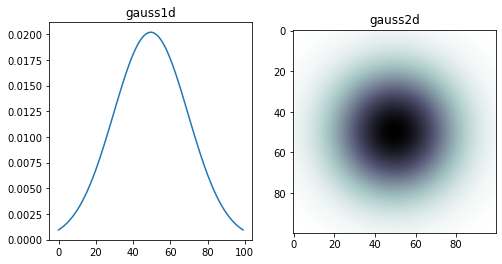

In [25]:
#GaussianBlur


gauss1d = cv2.getGaussianKernel(100,20)

gauss2d = gauss1d @ gauss1d.T #전치

plt.figure(figsize=(8,4))
#가우시안 커널 값
plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title('gauss1d')

#가우시안 커널 값02
plt.subplot(122)
plt.imshow(gauss2d, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title('gauss2d')
plt.show()

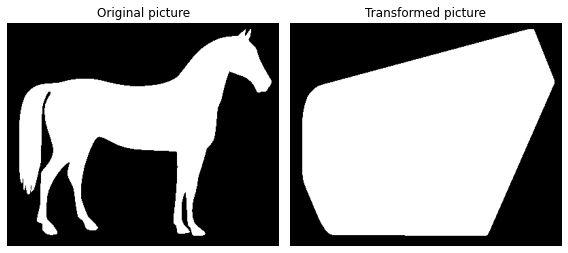

In [32]:
#2-6) 이미지 변환작업 skimage - image 예제
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
# The original image is inverted as the object must be white.
image = invert(data.horse())
chull = convex_hull_image(image)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

2-7 형태 변환(morpological region)
2진화로 변환한 이미지로 침식, 팽창, 그레디언트, 오프닝, 클로징등의 작업을 할때 같이 사용한다.
cv2.getStructuringElement(shape, ksize[, anchor]) → retval
shape :MORPH_RET : 사각형 모양
       MORPH_ELLIPSE : 타원형 모양
       MORPH_CROSS : 십자 모양


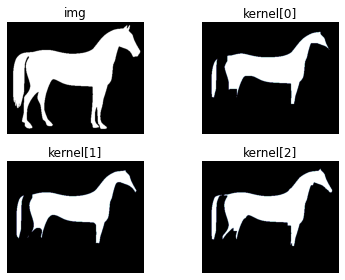

In [41]:
#2-8 침식 : 각픽셀에 커널을 적용해서 커널 영역의 최솟값으로 해당 픽셀을 대처한다.

import matplotlib.pyplot as plt
import cv2
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ["kernel[0]","kernel[1]","kernel[2]"]
#원본이미지
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("img")

#침식화 cv2.erode(src,kernel)
for i in range(3):
    res = cv2.erode(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

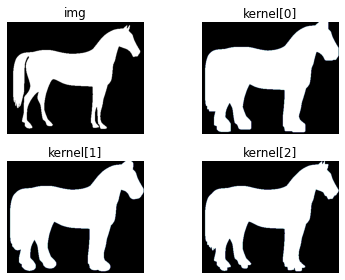

In [42]:
#2-9 팽창 

import matplotlib.pyplot as plt
import cv2
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ["kernel[0]","kernel[1]","kernel[2]"]
#원본이미지
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("img")

#팽창 cv2.dilate(src,kernel)
for i in range(3):
    res = cv2.dilate(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

2-10)  그레디언트 : 팽창으로 확장된 영역 - 침식으로 축소된 영역 -> 윤곽선으로 추출
오프닝 : 침식->팽창을 적용한다. 결과 : 적용영역이 둥글된다. (점, 작은 물체, 돌기)
클로즈 : 팽창 -> 침식 : 윤곽확인
cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
 - op 
MORPH_OPEN -> cv2.dilate(cv2.erode(img))
MORPH_CLOSE -> cv2.erode(cv2.dilate(img))
MORPH_GRADIENT -> cv2.dilate() - cv2.erode()
MORPH_TOPHAT -> opening(img)
MORPH_BLACKHAT -> closing(img)

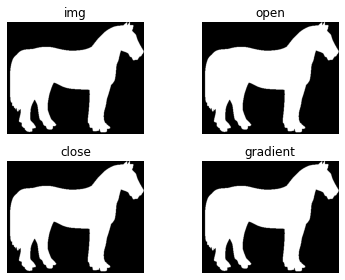

In [44]:
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')

img = np.ones(img.shape) - img

size = (20,20)

open =cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))

close =cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))

gradient =cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))

title = ["img",'open','close','gradient']
images = [img,open,close,gradient]


for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(res,cmap='gray')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()